# RETO | Caso Líneas Aéreas por Marco Armando Escobar

### Duración: 2.5 horas 
 
### Introducción 
El transporte aéreo o transporte por avión es el servicio de trasladar de un lugar a otro, pasajeros o cargamento mediante la utilización de aeronaves con fines lucrativos. Los adelantos de la navegación aérea y las telecomunicaciones, así como las facilidades electrónicas, han permitido que la aviación haya progresado de forma asombrosa. Uno de los datos relevantes dentro del servicio de las líneas aéreas es el tiempo, esto es el llegar a tiempo al destino ofertado. De igual manera existen otros factores clave, y uno de ellos, que es clave, es el precio del boleto al destino deseado.

### Objetivo
El negocio desea brindar un mejor servicio a los clientes de las líneas aéreas, para conseguirlo, es necesario determinar y analizar las variables relevantes en el servicio. En especial los factores clave que determinan el precio del boleto.

### Instrucciones
- 1. Usa las dos bases de datos para definir y analizar las variables y poner realizar lo siguiente. 
- 2. Análisis descriptivo de las variables que describen el comportamiento del Servicio en las aerolíneas: 
- 3. Análisis de multicolinealidad.
- 4. Construir la ecuación o modelo matemático (copia y pega de la información proporcionada) Indica si el modelo es congruente, es decir, no presenta efectos de multicolinealidad.
- 5. Validación estadística del modelo:
     - Medidas de calidad del ajuste.
     - Prueba de hipótesis para la ecuación (F).
     - Prueba de hipótesis para cada una de las variables independientes (t).
- 6. Validación de supuestos:
     - Normalidad en los residuales.
     - Errores con varianza constante.
     - Independencia de los errores.
     - Predicción del precio de venta.


### Importamos paqueterias

In [659]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
from scipy import stats
import statsmodels.api as sm
from IPython.display import display


### Importamos base de datos

In [90]:
regresion = pd.read_csv("/Users/marcoescobararrazola/Documents/RETO_CausalPredictivo/data/DescargarCasoAerolineasDatos.csv")
originales = pd.read_excel("/Users/marcoescobararrazola/Documents/RETO_CausalPredictivo/data/DescargarDatosOriginales.xlsx",sheet_name='DatosOriginales')

In [91]:
originales

,Airline,AA,Delta,United,Airport Code-1,Airport Code,Airport Name,Days from Purchase to Travel,Fare Type,Business,...,Martes,Miércoles,Jueves,Viernes,Sábado,Trips,Type of Traveler,Infrequent,Frequent,Extreme
0,Delta,0,1,0,GRB,GRB,Austin Straubel International Airport,47,Business,1,...,0,0,0,0,0,5,Casual,0,0,0
1,American Airlines,1,0,0,SLC,SLC,Salt Lake City International Airport,88,Economy,0,...,0,0,0,0,0,5,Casual,0,0,0
2,United,0,0,1,SLC,SLC,Salt Lake City International Airport,31,Economy,0,...,0,0,0,0,0,5,Casual,0,0,0
3,American Airlines,1,0,0,SLC,SLC,Salt Lake City International Airport,38,First Class,0,...,0,0,0,0,0,9,Casual,0,0,0
4,Southwest,0,0,0,ELP,ELP,El Paso International Airport,46,First Class,0,...,0,0,0,0,0,7,Casual,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Southwest,0,0,0,DAL,DAL,Dallas Love Field,44,First Class,0,...,0,0,0,1,0,18,Extreme,0,0,1
104,United,0,0,1,DFW,DFW,Dallas Fort Worth International Airport,54,First Class,0,...,0,0,0,1,0,16,Extreme,0,0,1
105,United,0,0,1,MEM,MEM,Memphis International Airport,67,Business,1,...,0,0,0,1,0,2,Infrequent,1,0,0
106,United,0,0,1,DFW,DFW,Dallas Fort Worth International Airport,67,Business,1,...,0,0,0,1,0,2,Infrequent,1,0,0


### Estadística Descriptiva

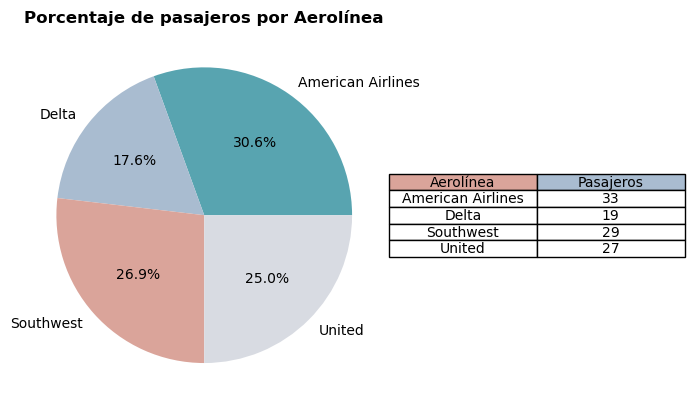

In [319]:
#Pasajeor por Arelinea:
mis_colores = ['#58A4B0', '#A9BCD0', '#DAA49A', '#D8DBE2', '#A9BCD0']
Pasajeros_Aero = originales.groupby(by='Airline').count()['AA']
Pasajeros_Aero = Pasajeros_Aero.rename("Pasajeros")
plt.pie(x=Pasajeros_Aero, colors=mis_colores, labels=Pasajeros_Aero.index.to_list(),  autopct='%1.1f%%')
plt.title("Porcentaje de pasajeros por Aerolínea", fontdict={'fontweight':'bold'})
plt.table(cellText=Pasajeros_Aero.reset_index().values, colLabels=["Aerolínea", "Pasajeros"],
                  cellLoc='center', loc='right', colColours=['#DAA49A', '#A9BCD0'], colWidths = [0.4, 0.4])
plt.show()

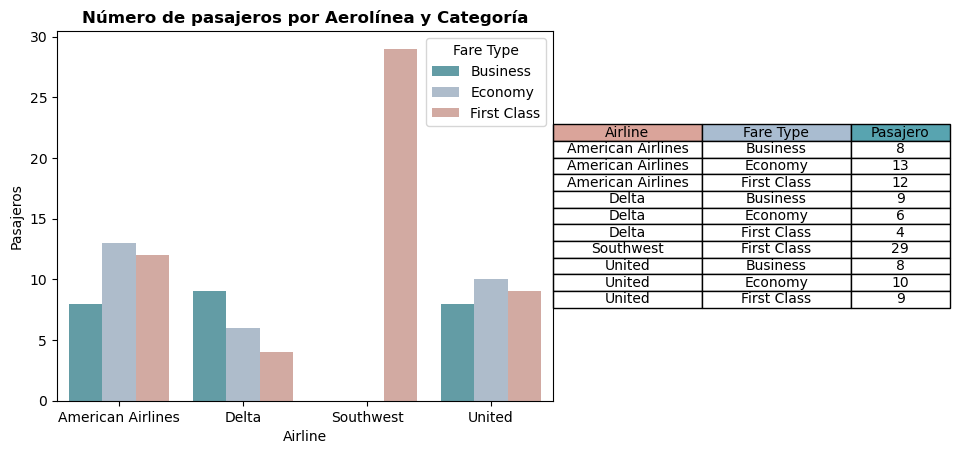

In [320]:
# Pasajeros por Areolinea y Categorí
mis_colores = ['#58A4B0', '#A9BCD0', '#DAA49A']
Aero_Cat = originales.groupby(by = ['Airline', 'Fare Type']).count()['AA'].reset_index()
Aero_Cat = Aero_Cat.rename(columns = {'AA':'Pasajeros'}, )

sns.barplot(data = Aero_Cat, x = 'Airline', y = 'Pasajeros', hue = 'Fare Type', palette=mis_colores)
plt.title('Número de pasajeros por Aerolínea y Categoría', fontdict = {'fontweight':'bold'})
plt.table(cellText=Aero_Cat.values, colLabels=["Airline", "Fare Type", "Pasajero"],
                  cellLoc='center', loc='right', colColours=['#DAA49A', '#A9BCD0', '#58A4B0'], colWidths = [0.3, 0.3, 0.2]);

In [321]:
# Pasajeros por frecuencia de vuelo-aerolínea-tipo de tarifa
Business = originales[originales['Fare Type']=='Business']
Business = Business.groupby(by = ['Airline','Type of Traveler']).count()['AA'].reset_index()
Economy = originales[originales['Fare Type']=='Economy']
Economy = Economy.groupby(by = ['Airline','Type of Traveler']).count()['AA'].reset_index()
First_Class = originales[originales['Fare Type']=='First Class']
First_Class = First_Class.groupby(by = ['Airline','Type of Traveler']).count()['AA'].reset_index()


In [322]:
Business = Business.rename(columns = {"AA":"Pasajeros"})
Economy = Economy.rename(columns = {"AA":"Pasajeros"})
First_Class = First_Class.rename(columns = {"AA":"Pasajeros"})

# Hacemos tablas wider con pivot table
table_Buss = Business.pivot_table(values="Pasajeros", index="Airline", columns="Type of Traveler", fill_value= 0)
table_Economy = Economy.pivot_table(values="Pasajeros", index="Airline", columns="Type of Traveler", fill_value= 0)
table_FC = First_Class.pivot_table(values="Pasajeros", index="Airline", columns="Type of Traveler", fill_value= 0)


/var/folders/k7/778gcqg54pnfx9lbjbsj7pgm0000gn/T/ipykernel_80025/3233308270.py:3: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(Business, x= "Pasajeros", y = "Airline", hue = "Type of Traveler", orient = "h", ax=ax[0,0],
/var/folders/k7/778gcqg54pnfx9lbjbsj7pgm0000gn/T/ipykernel_80025/3233308270.py:12: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(Economy, x= "Pasajeros", y = "Airline", hue = "Type of Traveler", orient = "h", ax=ax[1,0],
/var/folders/k7/778gcqg54pnfx9lbjbsj7pgm0000gn/T/ipykernel_80025/3233308270.py:21: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(First_Class, x= "Pasajeros", y = "Airline", hue = "Type of Traveler", orient = "h", ax=ax[2,0],
/var/folders/k7/778gcqg54pnfx9lbjbsj7pgm0000gn/T

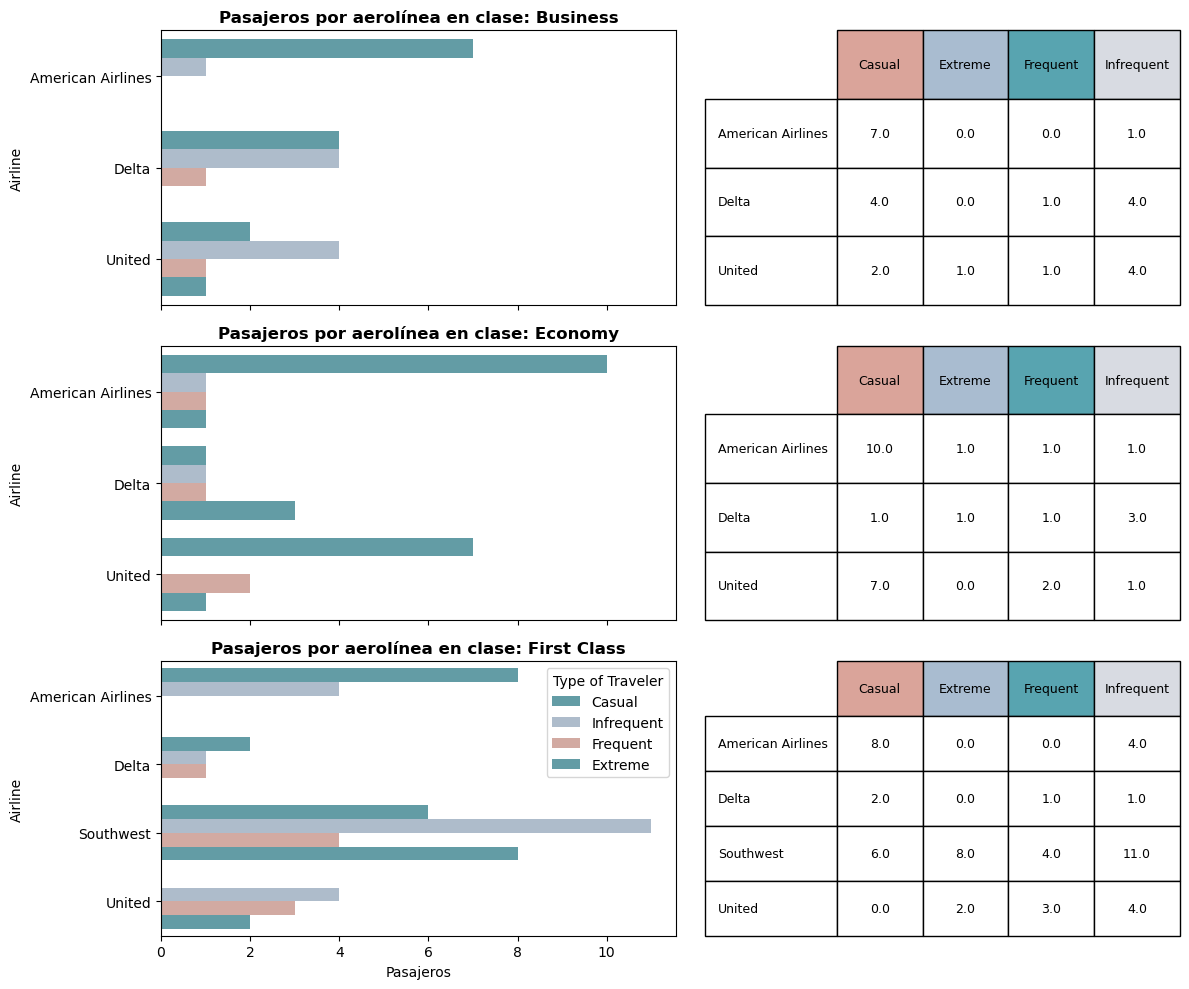

In [325]:

fig, ax = plt.subplots(3,2, figsize = (12, 10), sharex=True, gridspec_kw={'width_ratios': [3, 2]},
    constrained_layout=True)
sns.barplot(Business, x= "Pasajeros", y = "Airline", hue = "Type of Traveler", orient = "h", ax=ax[0,0], 
            palette=mis_colores, legend=False)
ax[0,0].set_title("Pasajeros por aerolínea en clase: Business", fontdict = {"fontweight":"bold"})
ax[0,1].axis('off')
ax[0,1].table(cellText=table_Buss,cellLoc='center', loc='center', bbox=[0, 0, 1, 1], 
              colColours=['#DAA49A', '#A9BCD0', '#58A4B0', '#D8DBE2'], 
              colWidths = [0.4, 0.4, 0.4, 0.4, 0.4])


sns.barplot(Economy, x= "Pasajeros", y = "Airline", hue = "Type of Traveler", orient = "h", ax=ax[1,0], 
            palette=mis_colores, legend=False)
ax[1,0].set_title("Pasajeros por aerolínea en clase: Economy", fontdict = {"fontweight":"bold"})
ax[1,1].axis('off')
ax[1,1].table(cellText=table_Economy, cellLoc='center', loc='center', bbox=[0, 0, 1, 1], 
              colColours=['#DAA49A', '#A9BCD0', '#58A4B0', '#D8DBE2'], 
              colWidths = [0.4, 0.4, 0.4, 0.4, 0.4])


sns.barplot(First_Class, x= "Pasajeros", y = "Airline", hue = "Type of Traveler", orient = "h", ax=ax[2,0], 
            palette=mis_colores)
ax[2, 0].set_title("Pasajeros por aerolínea en clase: First Class", fontdict = {"fontweight":"bold"})
ax[2,1].axis('off')
ax[2,1].table(cellText=table_FC, cellLoc='center', loc='center', bbox=[0, 0, 1, 1], 
              colColours=['#DAA49A', '#A9BCD0', '#58A4B0', '#D8DBE2'], 
              colWidths = [0.4, 0.4, 0.4, 0.4, 0.4])

plt.ylabel("Aerolinea")
plt.tight_layout()
plt.show()




Text(0.5, 1.0, 'Número de vuelos – ruta de vuelo por aerolínea')

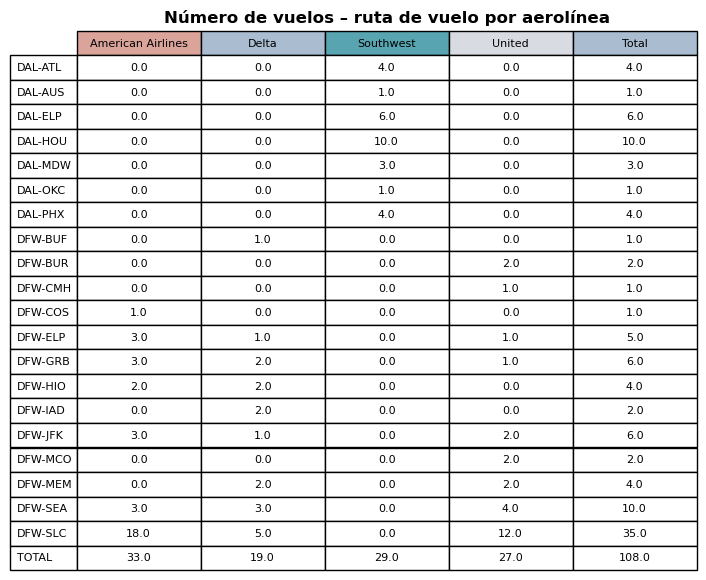

In [449]:
Ruta = originales.groupby("Airline")["Route"].value_counts().reset_index()
Ruta =  Ruta.pivot_table(values="count", index = "Route", columns="Airline", fill_value=0)
Ruta.index.name = " "
Ruta.columns.name = "Route"
Ruta['Total'] = Ruta.sum(axis=1, numeric_only=True)
Ruta.loc['TOTAL'] = Ruta.sum(numeric_only=True)


fig, ax = plt.subplots(figsize = (8,7))
ax.axis("off")
ax.table(cellText=Ruta.to_numpy(),
         rowLabels=Ruta.index.tolist(),
         colLabels=Ruta.columns.tolist(),
         colColours=['#DAA49A', '#A9BCD0', '#58A4B0', '#D8DBE2', '#A9BCD0'],
         cellLoc='center',
         loc='center',
         bbox=[0, 0, 1, 1] )
ax.set_title("Número de vuelos – ruta de vuelo por aerolínea", fontdict = {"fontweight":"bold"})

In [446]:
Business = originales[originales['Fare Type']=='Business'].groupby("Airline")["Route"].value_counts().reset_index()
Business =  Business.pivot_table(values="count", index = "Route", columns="Airline", fill_value=0)
Business['Total'] = Business.sum(axis=1, numeric_only=True)
Business.loc['TOTAL'] = Business.sum(numeric_only=True)

Economy = originales[originales['Fare Type']=='Economy'].groupby("Airline")["Route"].value_counts().reset_index()
Economy =  Economy.pivot_table(values="count", index = "Route", columns="Airline", fill_value=0)
Economy['Total'] = Economy.sum(axis=1, numeric_only=True)
Economy.loc['TOTAL'] = Economy.sum(numeric_only=True)

First_Class = originales[originales['Fare Type']=='First Class'].groupby("Airline")["Route"].value_counts().reset_index()
First_Class =  First_Class.pivot_table(values="count", index = "Route", columns="Airline", fill_value=0)
First_Class['Total'] = First_Class.sum(axis=1, numeric_only=True)
First_Class.loc['TOTAL'] = First_Class.sum(numeric_only=True)


Text(0.5, 1.0, 'Vuelos por ruta-aerolínea -tipo de tarifa (First Class)')

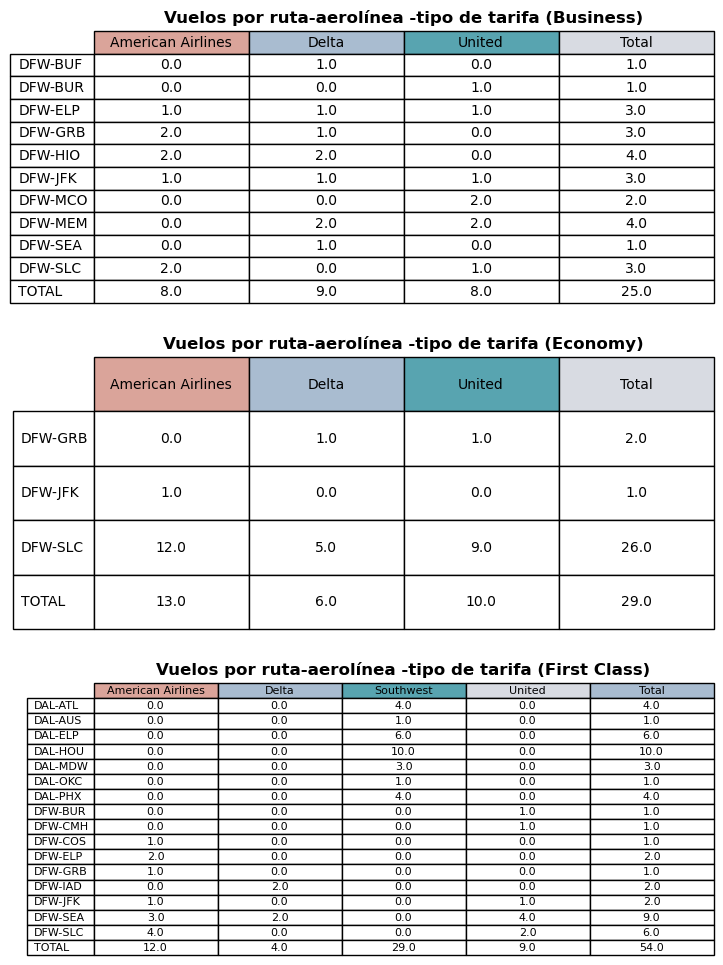

In [459]:
fig, ax = plt.subplots(3, 1, figsize = (8,12))
ax[0].axis("off")
ax[0].table(cellText=Business.to_numpy(),
         rowLabels=Business.index.tolist(),
         colLabels=Business.columns.tolist(),
         colColours=['#DAA49A', '#A9BCD0', '#58A4B0', '#D8DBE2', '#A9BCD0'],
         cellLoc='center',
         loc='center',
         bbox=[0, 0, 1, 1] )
ax[0].set_title("Vuelos por ruta-aerolínea -tipo de tarifa (Business)", fontdict = {"fontweight":"bold"})
ax[1].axis("off")
ax[1].table(cellText=Economy.to_numpy(),
         rowLabels=Economy.index.tolist(),
         colLabels=Economy.columns.tolist(),
         colColours=['#DAA49A', '#A9BCD0', '#58A4B0', '#D8DBE2', '#A9BCD0'],
         cellLoc='center',
         loc='center',
         bbox=[0, 0, 1, 1] )
ax[1].set_title("Vuelos por ruta-aerolínea -tipo de tarifa (Economy)", fontdict = {"fontweight":"bold"})
ax[2].axis("off")
ax[2].table(cellText=First_Class.to_numpy(),
         rowLabels=First_Class.index.tolist(),
         colLabels=First_Class.columns.tolist(),
         colColours=['#DAA49A', '#A9BCD0', '#58A4B0', '#D8DBE2', '#A9BCD0'],
         cellLoc='center',
         loc='center',
         bbox=[0, 0, 1, 1] )
ax[2].set_title("Vuelos por ruta-aerolínea -tipo de tarifa (First Class)", fontdict = {"fontweight":"bold"})

In [500]:
Business = originales[originales['Fare Type']=='Business'].groupby(["Airline", "Route"])["Ticket Price"].sum().reset_index()
Business =  Business.pivot_table(values="Ticket Price", index = "Route", columns="Airline", fill_value=0)
Business.index.name = " "
Business.columns.name = "Route"
Business['Total'] = Business.sum(axis=1, numeric_only=True)
Business.loc['TOTAL'] = Business.sum(numeric_only=True)


Economy = originales[originales['Fare Type']=='Economy'].groupby(["Airline", "Route"])["Ticket Price"].sum().reset_index()
Economy =  Economy.pivot_table(values="Ticket Price", index = "Route", columns="Airline", fill_value=0)
Economy.index.name = " "
Economy.columns.name = "Route"
Economy['Total'] = Economy.sum(axis=1, numeric_only=True)
Economy.loc['TOTAL'] = Economy.sum(numeric_only=True)

First_Class = originales[originales['Fare Type']=='First Class'].groupby(["Airline", "Route"])["Ticket Price"].sum().reset_index()
First_Class =  First_Class.pivot_table(values="Ticket Price", index = "Route", columns="Airline", fill_value=0, )
First_Class.index.name = " "
First_Class.columns.name = "Route"
First_Class['Total'] = round(First_Class.sum(axis=1, numeric_only=True), 2)
First_Class.loc['TOTAL'] = round(First_Class.sum(numeric_only=True),2)


Text(0.5, 1.0, 'Ingreso total -ruta por aerolínea -tipo de tarifa (First Class)')

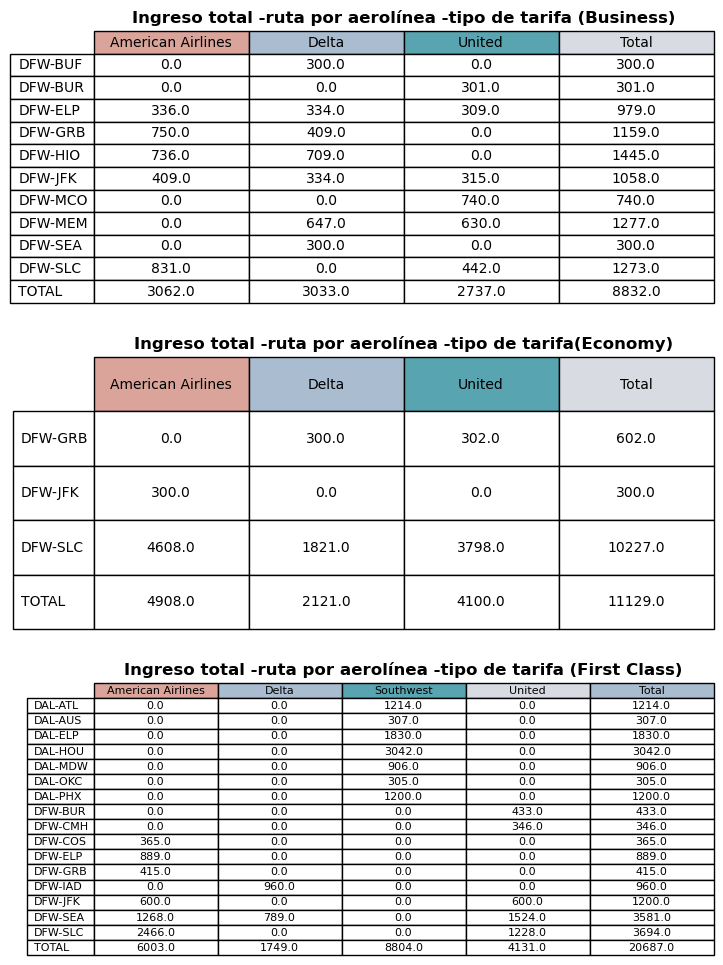

In [501]:
fig, ax = plt.subplots(3, 1, figsize = (8,12))
ax[0].axis("off")
ax[0].table(cellText=Business.to_numpy(),
         rowLabels=Business.index.tolist(),
         colLabels=Business.columns.tolist(),
         colColours=['#DAA49A', '#A9BCD0', '#58A4B0', '#D8DBE2', '#A9BCD0'],
         cellLoc='center',
         loc='center',
         bbox=[0, 0, 1, 1] )
ax[0].set_title("Ingreso total -ruta por aerolínea -tipo de tarifa (Business)", fontdict = {"fontweight":"bold"})
ax[1].axis("off")
ax[1].table(cellText=Economy.to_numpy(),
         rowLabels=Economy.index.tolist(),
         colLabels=Economy.columns.tolist(),
         colColours=['#DAA49A', '#A9BCD0', '#58A4B0', '#D8DBE2', '#A9BCD0'],
         cellLoc='center',
         loc='center',
         bbox=[0, 0, 1, 1] )
ax[1].set_title("Ingreso total -ruta por aerolínea -tipo de tarifa(Economy)", fontdict = {"fontweight":"bold"})
ax[2].axis("off")
ax[2].table(cellText=First_Class.to_numpy(),
         rowLabels=First_Class.index.tolist(),
         colLabels=First_Class.columns.tolist(),
         colColours=['#DAA49A', '#A9BCD0', '#58A4B0', '#D8DBE2', '#A9BCD0'],
         cellLoc='center',
         loc='center',
         bbox=[0, 0, 1, 1] )
ax[2].set_title("Ingreso total -ruta por aerolínea -tipo de tarifa (First Class)", fontdict = {"fontweight":"bold"})

In [497]:
Business = originales[originales['Fare Type']=='Business'].groupby(["Airline", "Route"])["Ticket Price"].mean().reset_index()
Business =  Business.pivot_table(values="Ticket Price", index = "Route", columns="Airline", fill_value=0)
Business.index.name = " "
Business.columns.name = "Route"
Business['Total'] = Business.sum(axis=1, numeric_only=True)
Business.loc['TOTAL'] = Business.sum(numeric_only=True)

Economy = originales[originales['Fare Type']=='Economy'].groupby(["Airline", "Route"])["Ticket Price"].mean().reset_index()
Economy =  Economy.pivot_table(values="Ticket Price", index = "Route", columns="Airline", fill_value=0)
Economy.index.name = " "
Economy.columns.name = "Route"
Economy['Total'] = Economy.sum(axis=1, numeric_only=True)
Economy.loc['TOTAL'] = Economy.sum(numeric_only=True)

First_Class = originales[originales['Fare Type']=='First Class'].groupby(["Airline", "Route"])["Ticket Price"].mean().reset_index()
First_Class =  First_Class.pivot_table(values="Ticket Price", index = "Route", columns="Airline", fill_value=0, )
First_Class.index.name = " "
First_Class.columns.name = "Route"
First_Class['Total'] = round(First_Class.sum(axis=1, numeric_only=True), 2)
First_Class.loc['TOTAL'] = round(First_Class.sum(numeric_only=True),2)

Text(0.5, 1.0, 'Precio promedio por vuelo - ruta por aerolínea - tipo de tarifa (First Class)')

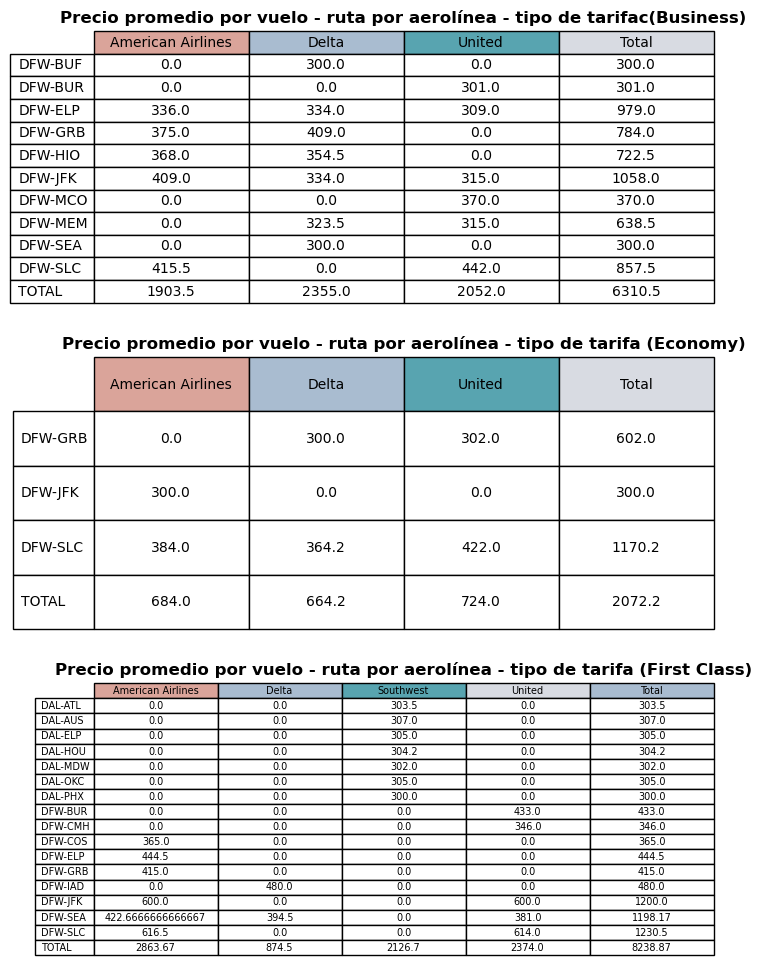

In [499]:
fig, ax = plt.subplots(3, 1, figsize = (8,12))
ax[0].axis("off")
ax[0].table(cellText=Business.to_numpy(),
         rowLabels=Business.index.tolist(),
         colLabels=Business.columns.tolist(),
         colColours=['#DAA49A', '#A9BCD0', '#58A4B0', '#D8DBE2', '#A9BCD0'],
         cellLoc='center',
         loc='center',
         bbox=[0, 0, 1, 1] )
ax[0].set_title("Precio promedio por vuelo - ruta por aerolínea - tipo de tarifac(Business)", fontdict = {"fontweight":"bold"})
ax[1].axis("off")
ax[1].table(cellText=Economy.to_numpy(),
         rowLabels=Economy.index.tolist(),
         colLabels=Economy.columns.tolist(),
         colColours=['#DAA49A', '#A9BCD0', '#58A4B0', '#D8DBE2', '#A9BCD0'],
         cellLoc='center',
         loc='center',
         bbox=[0, 0, 1, 1] )
ax[1].set_title("Precio promedio por vuelo - ruta por aerolínea - tipo de tarifa (Economy)", fontdict = {"fontweight":"bold"})
ax[2].axis("off")
ax[2].table(cellText=First_Class.to_numpy(),
         rowLabels=First_Class.index.tolist(),
         colLabels=First_Class.columns.tolist(),
         colColours=['#DAA49A', '#A9BCD0', '#58A4B0', '#D8DBE2', '#A9BCD0'],
         cellLoc='center',
         loc='center',
         bbox=[0, 0, 1, 1] )
ax[2].set_title("Precio promedio por vuelo - ruta por aerolínea - tipo de tarifa (First Class)", fontdict = {"fontweight":"bold"})

Text(0.5, 0.98, 'Medidas de tendencia central y dispersión (Ticket Price)')

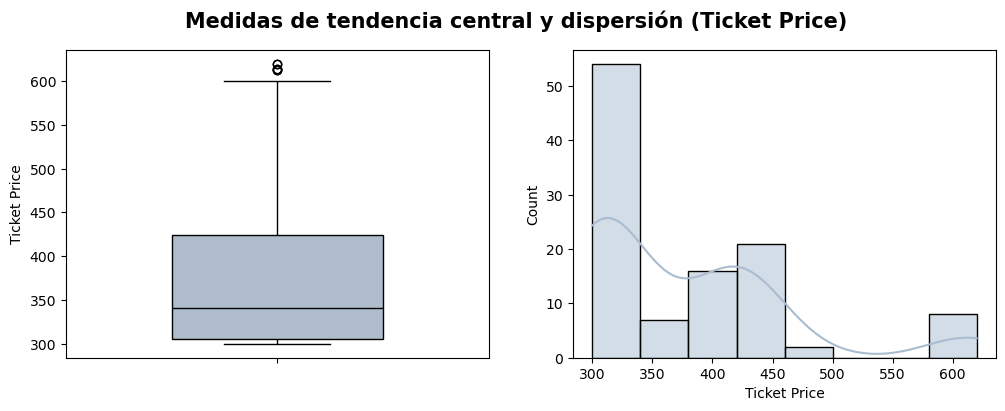

In [527]:
fig, ax = plt.subplots(1,2 ,figsize = (12,4))
sns.boxplot(originales["Ticket Price"], width=0.5, ax=ax[0], color='#A9BCD0', linecolor = "black")
sns.histplot(originales["Ticket Price"], ax=ax[1], color='#A9BCD0', kde=True)
fig.suptitle("Medidas de tendencia central y dispersión (Ticket Price)", fontweight = "bold", fontsize=15 )


Text(0.5, 0.98, 'Medidas de tendencia central y dispersión (Days from Purchase to Travel)')

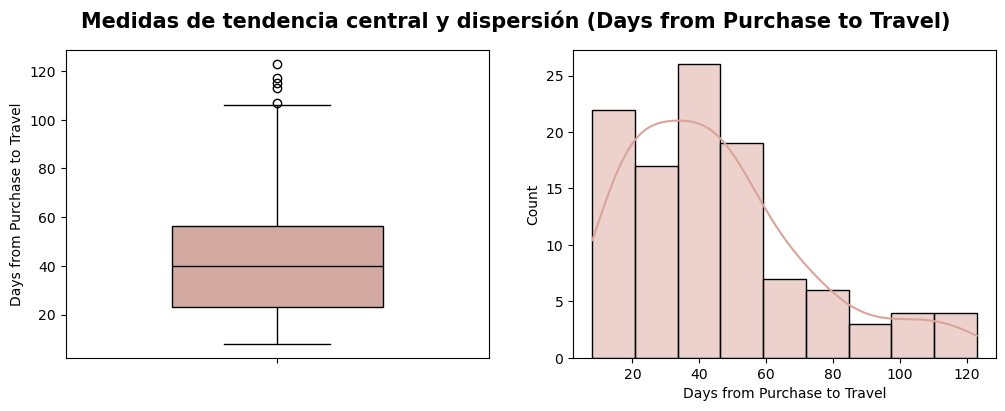

In [529]:
fig, ax = plt.subplots(1,2 ,figsize = (12,4))
sns.boxplot(originales["Days from Purchase to Travel"], width=0.5, ax=ax[0], color='#DAA49A', linecolor = "black")
sns.histplot(originales["Days from Purchase to Travel"], ax=ax[1], color='#DAA49A', kde=True)
fig.suptitle("Medidas de tendencia central y dispersión (Days from Purchase to Travel)", fontweight = "bold", fontsize=15 )


Text(0.5, 0.98, 'Medidas de tendencia central y dispersión (Trips)')

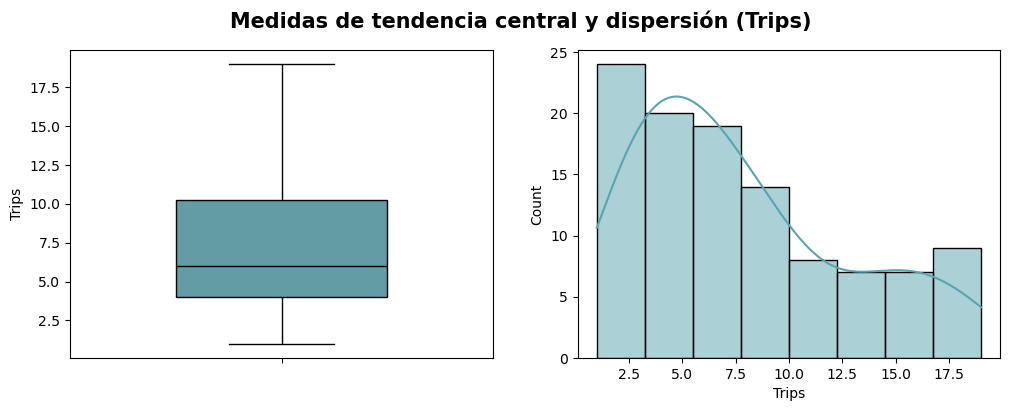

In [530]:
fig, ax = plt.subplots(1,2 ,figsize = (12,4))
sns.boxplot(originales["Trips"], width=0.5, ax=ax[0], color='#58A4B0', linecolor = "black")
sns.histplot(originales["Trips"], ax=ax[1], color='#58A4B0', kde=True)
fig.suptitle("Medidas de tendencia central y dispersión (Trips)", fontweight = "bold", fontsize=15 )


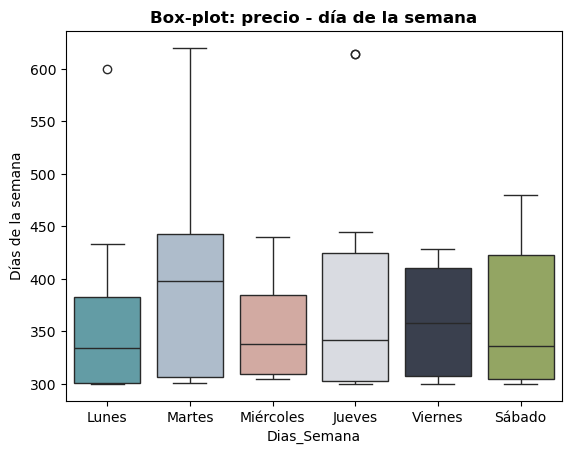

In [560]:
mis_colores = ['#58A4B0', '#A9BCD0', '#DAA49A', '#D8DBE2', '#373F51', "#98B058"]
dias = ['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado']
df_por_dia = pd.concat([originales.loc[originales[dia] == 1, 'Ticket Price'].rename(dia).reset_index(drop=True) for dia in dias], axis=1)
df_por_dia = df_por_dia.melt(value_vars=df_por_dia.columns, var_name="Dias_Semana", value_name="Precio Ticket", ignore_index=True)


sns.boxplot(df_por_dia, x = "Dias_Semana", y = "Precio Ticket", hue = "Dias_Semana", palette=mis_colores)
plt.title("Box-plot: precio - día de la semana", fontdict = {"fontweight":"bold"})
plt.ylabel("Días de la semana");

Text(0.5, 1.0, 'Matriz de correlación\n(variable dependiente: Ticket Price)')

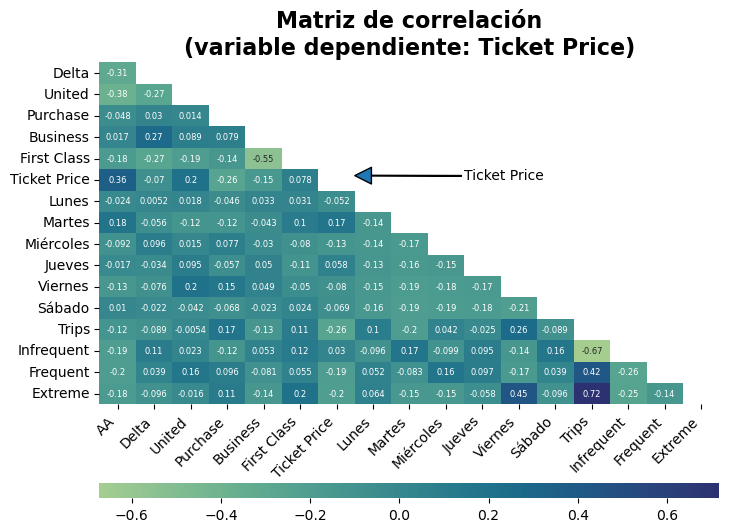

In [708]:
correlación = originales.corr(method="pearson", numeric_only=True, )
columnas    = ['AA', 'Delta', 'United', 'Days from Purchase to Travel', 'Business', 'First Class', 'Ticket Price',
 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Trips','Infrequent', 'Frequent', 'Extreme']
filas = ['Delta', 'United', 'Days from Purchase to Travel', 'Business', 'First Class', 'Ticket Price',
 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Trips','Infrequent', 'Frequent', 'Extreme']
subcorr = correlación.loc[filas, columnas]
subcorr = subcorr.rename(index = {"Days from Purchase to Travel":"Purchase"}, 
                         columns={"Days from Purchase to Travel":"Purchase"})

#Gráfica de Heatmap
fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(subcorr, mask=np.triu(np.ones_like(subcorr, dtype=bool), k=1), annot=True, annot_kws={'fontsize':6},linewidth=0,
           cbar_kws={'orientation': 'horizontal', 'pad': 0.17, 'fraction': 0.09, 'aspect': 40}, cmap="crest", 
            linewidths=1, linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.annotate(text='Ticket Price ',xy=(7,5.3), xytext=(10,5.5), arrowprops= {'width':0.5})
ax.set_title("Matriz de correlación\n(variable dependiente: Ticket Price)", fontdict = {"fontweight":"bold", 'fontsize':16})


# REGRESION LINEAL SIMPLE
## 1-. Diagrama de dispersión
## 2-. Construir la ecuación

Al usar el modelo de regresión lineal simple se hace una suposición acerca
de la relación entre x y y. Después usas el método de mínimos cuadrados
para obtener una ecuación de regresión lineal simple estimada. Si existe
una relación significante entre x e y y si el coeficiente de determinación
indica que el ajuste es bueno, la ecuación de regresión estimada te es útil
para estimaciones y predicciones.

                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     7.442
Date:                Wed, 03 Sep 2025   Prob (F-statistic):            0.00746
Time:                        22:28:04   Log-Likelihood:                -630.72
No. Observations:                 108   AIC:                             1265.
Df Residuals:                     106   BIC:                             1271.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        410.7509     14.971     27.437      0.0

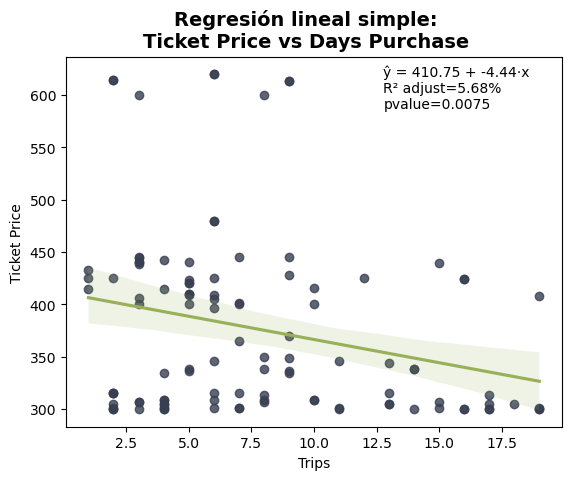

In [723]:
RL = originales[['Ticket Price','Trips']]

X = sm.add_constant(RL['Trips'])
y = RL['Ticket Price']
modelo = sm.OLS(y, X).fit()

b0 = modelo.params['const']
b1 = modelo.params['Trips']
r2 = modelo.rsquared_adj
r = np.sqrt(modelo.rsquared_adj)
p_slope = modelo.pvalues['Trips']

#Tabla de resumen para Mínimos cuadrados (Least Square) en regresion simple
print(modelo.summary())

# Fórmula de regresión lineal estimada
formula_estim = f"ŷ = {b0:.2f} + {b1:.2f}·x\nR² adjust={r2*100:.2f}%\npvalue={p_slope:.2g}"
print(f'Fórmula:{formula_estim}')

# Gráfica de regresión lineal simple
fig, ax = plt.subplots()
sns.regplot(RL, x ='Trips', y ='Ticket Price', 
           scatter_kws={'color':'#373F51'}, line_kws={'color':"#98B058"}, fit_reg=True, ax=ax)
ax.text(0.64, 0.98, formula_estim, transform=ax.transAxes,
        ha='left', va='top', fontsize=10,
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
fig.suptitle('Regresión lineal simple:\nTicket Price vs Days Purchase', fontsize=14, fontweight = 'bold')
plt.show()



## 2-. Validación estadística

In [782]:
def Analisis_Varianza(x, y):
    x = np.asarray(x, 'float')
    y = np.asarray(y, 'float')
    n = x.size
    x_mean = x.mean() 
    y_mean = y.mean()
    
    # Coeficientes OLS (regresión simple)
    Sxx = ((x - x_mean)**2).sum()
    Sxy = ((x - x_mean)*(y - y_mean)).sum()
    b1 = Sxy / Sxx
    b0 = y_mean - b1*x_mean
    
    # Ajustes y residuales
    yhat = b0 + b1*x
    resid = y - yhat

    # Sumas de cuadrados
    SCE = (resid**2).sum()            
    STC = ((y - y_mean)**2).sum()       
    SCR = STC - SCE       
    
    # Grados de libertad
    df_regresion = 1
    df_error = n - 2

    #Errores
    CMR = SCR / df_regresion       
    ECM = SCE / df_error              
    F_value = CMR / ECM

    #Coefciientes
    R2 = SCR / STC
    se_b1 = np.sqrt(ECM / Sxx)
    t_b1 = b1 / se_b1

    #pvalue
    valorp = stats.f.sf(F_value, 1, n -2)

    #RESULTAODS
    resultados = pd.Series({
        "intersecto(b0)": b0, "pendiente(b1)": b1,
        "SCE": SCE, "STC": STC, "SCR": SCR,
        "CMR": CMR, "ECM": ECM, "F": F_value,
        "R2": R2, "t_b1": t_b1,
        "df_regresion": df_regresion, "df_error": df_error, 'Valor_p':valorp})
    
    tabla = pd.DataFrame({
        'Fuente de variación': pd.Series(['Regresión', 'Error', 'Total'], index = [0, 1, 2]),
        'Suma de Cuadrados': pd.Series([SCR, SCE, STC], index = [0, 1, 2]),
        'Grados de libertad': pd.Series([1, n-2, n-1], index = [0, 1, 2]),
        'Cuadrado Medio': pd.Series([CMR, ECM], index = [0, 1]),
        'F': pd.Series([F_value], index = [0]),
        'Valor-p': pd.Series([valorp], index = [0])
    }).round(3)

    
    return display(tabla)

In [783]:
Analisis_Varianza(x = originales['Trips'], y = originales['Ticket Price'])

,Fuente de variación,Suma de Cuadrados,Grados de libertad,Cuadrado Medio,F,Valor-p
0,Regresión,52471.293,1,52471.293,7.442,0.007
1,Error,747389.893,106,7050.848,NaN,NaN
2,Total,799861.185,107,NaN,NaN,NaN


## 4-. Validación de supuestos
El análisis de residuales es el principal método estadístico para verificar si
las suposiciones del modelo de regresión son válidas. Aun cuando no se
encuentre ninguna violación, esto no necesariamente implica que el
modelo vaya a proporcionar buenas predicciones.